<a href="https://colab.research.google.com/github/linccolnevans/datascience/blob/main/LincEvanU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm


In [27]:

MLB_SO_data_23 = np.repeat([1,0], repeats = [164367,41826])


In [26]:
MLB_SO_data_23.shape

(206193,)

<Axes: >

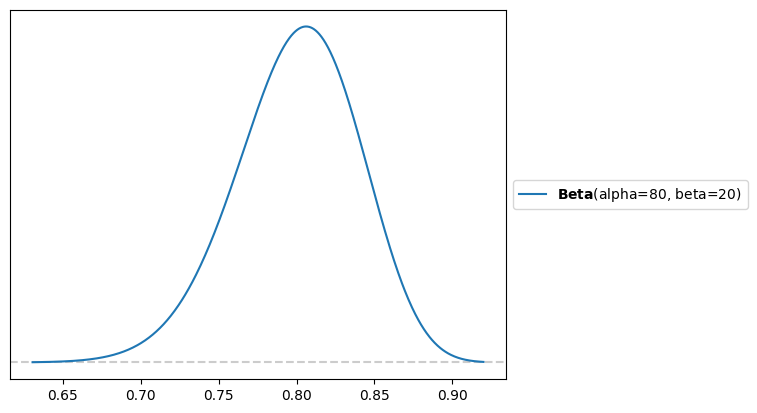

In [5]:
pz.Beta(alpha=80,beta=20).plot_pdf()

I believe that the league average strike out rate will be around 20 percent because I see more posts every day about strike outs in a game, especially with pitch speeds getting faster and faster.

In [33]:

#Nearly every single model we will build in this class will have
#the below outline as its foundation. Get hyped.

with pm.Model() as MLB_SO_model_23:
  #we define our prior with the makes and misses from Euroleague
  #notice how we make alpha and beta floats by using '.'
  θ = pm.Beta('0' , alpha = 80. , beta = 20.)

  #we define our likelihood, which is how we process the free throws
  #we've seen Wemby make in the NBA
  #Think of Bernoulli as a stand in for the binomial distribution
  #It doesn't have inherent info about number of attempts, but number of attempts
  #is included in the data anyway.

  y = pm.Bernoulli('y', p = θ, observed = MLB_SO_model_23)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_MLB_SO_23_Model = pm.sample(164367)


ValueError: setting an array element with a sequence.

In [31]:

#Wemby's FTs in the 2023/2024 season, makes then misses
FT_data_2324 = np.repeat([1,0], repeats = [292,75])


with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 24. , beta = 8.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)


In [21]:


az.plot_posterior(idata_MLB_SO_23_Model)

NameError: name 'idata_MLB_SO_Model' is not defined